In [1]:
import Cnn_tool.make_image

In [2]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/02


### rootファイルからdatasetを作る

In [3]:
# read root file
rdf_gamma = r.RDataFrame("Tile_Edep", "gamma.root")
rdf_pi0 = r.RDataFrame("Tile_Edep", "pi0.root")
print(rdf_gamma.AsNumpy().keys(), rdf_pi0.AsNumpy().keys())

dict_keys(['Edep', 'Enumber', 'GorA', 'Lnumber', 'TXnumber', 'TYnumber']) dict_keys(['Edep', 'Enumber', 'GorA', 'Lnumber', 'TXnumber', 'TYnumber'])


In [4]:
# filter Gap only
nd_gamma = rdf_gamma.Filter("GorA==1").AsNumpy()
nd_pi0 = rdf_pi0.Filter("GorA==1").AsNumpy()
print(nd_gamma["Enumber"].shape, nd_pi0["Enumber"].shape)

(1517166,) (1573132,)


In [5]:
# serect branch
arr_gamma = np.stack([
    nd_gamma["Enumber"],
    nd_gamma["Lnumber"],
    nd_gamma["TXnumber"],
    nd_gamma["TYnumber"],
    nd_gamma["Edep"]
])
arr_pi0 = np.stack([
    nd_pi0["Enumber"],
    nd_pi0["Lnumber"],
    nd_pi0["TXnumber"],
    nd_pi0["TYnumber"],
    nd_pi0["Edep"]
])
print(arr_gamma.shape, arr_pi0.shape)

(5, 1517166) (5, 1573132)


In [6]:
arr_gamma = np.transpose(arr_gamma)
arr_pi0 = np.transpose(arr_pi0)
print(arr_gamma.shape, arr_pi0.shape)

(1517166, 5) (1573132, 5)


In [7]:
# create hitmap gamma
zhitmap_gamma = Cnn_tool.make_image.hitmap(arr_gamma, 0)
xhitmap_gamma = Cnn_tool.make_image.hitmap(arr_gamma, 1)
yhitmap_gamma = Cnn_tool.make_image.hitmap(arr_gamma, 2)

100%|██████████| 10000/10000 [00:18<00:00, 555.47it/s]


In [8]:
# create hitmap pi0
zhitmap_pi0 = Cnn_tool.make_image.hitmap(arr_pi0, 0)
xhitmap_pi0 = Cnn_tool.make_image.hitmap(arr_pi0, 1)
yhitmap_pi0 = Cnn_tool.make_image.hitmap(arr_pi0, 2)

100%|██████████| 10000/10000 [00:18<00:00, 535.12it/s]


In [9]:
print(zhitmap_gamma.shape, xhitmap_gamma.shape, yhitmap_gamma.shape)
print(zhitmap_pi0.shape, xhitmap_pi0.shape, yhitmap_pi0.shape)

(10000, 100, 100) (10000, 100, 100) (10000, 100, 100)
(10000, 100, 100) (10000, 100, 100) (10000, 100, 100)


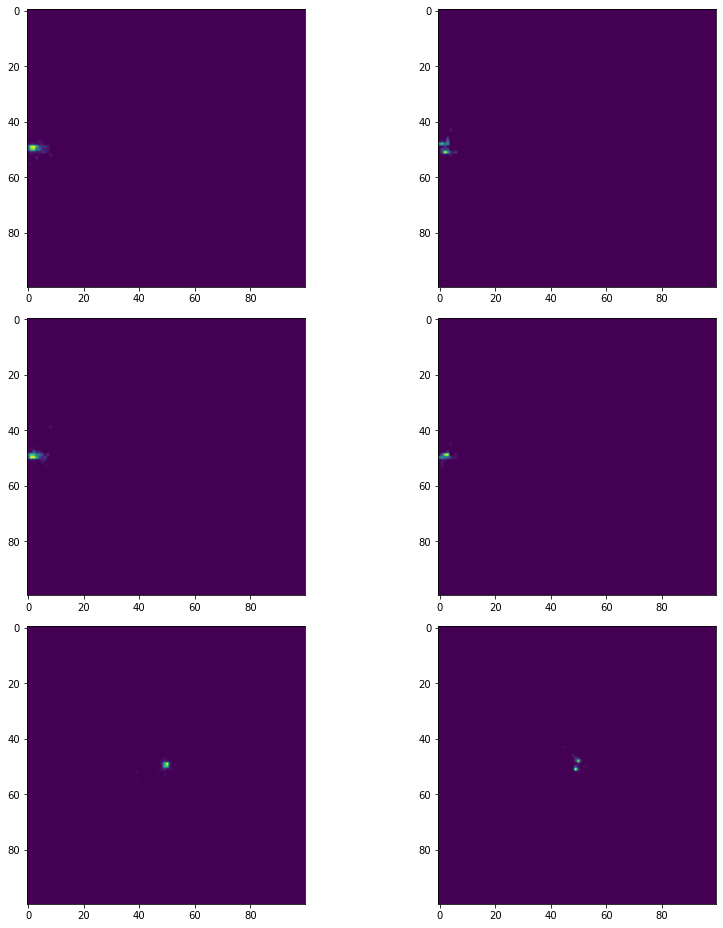

In [10]:
event_gamma = 388
event_pi0 = 4083

fig = plt.figure(figsize=(13, 13))

for i in range(1, 7):
    exec(f"ax{i} = fig.add_subplot(3, 2, {i})")

ax1.imshow(xhitmap_gamma[event_gamma])
ax3.imshow(yhitmap_gamma[event_gamma])
ax5.imshow(zhitmap_gamma[event_gamma])
ax2.imshow(xhitmap_pi0[event_pi0])
ax4.imshow(yhitmap_pi0[event_pi0])
ax6.imshow(zhitmap_pi0[event_pi0])
fig.tight_layout()
plt.show()

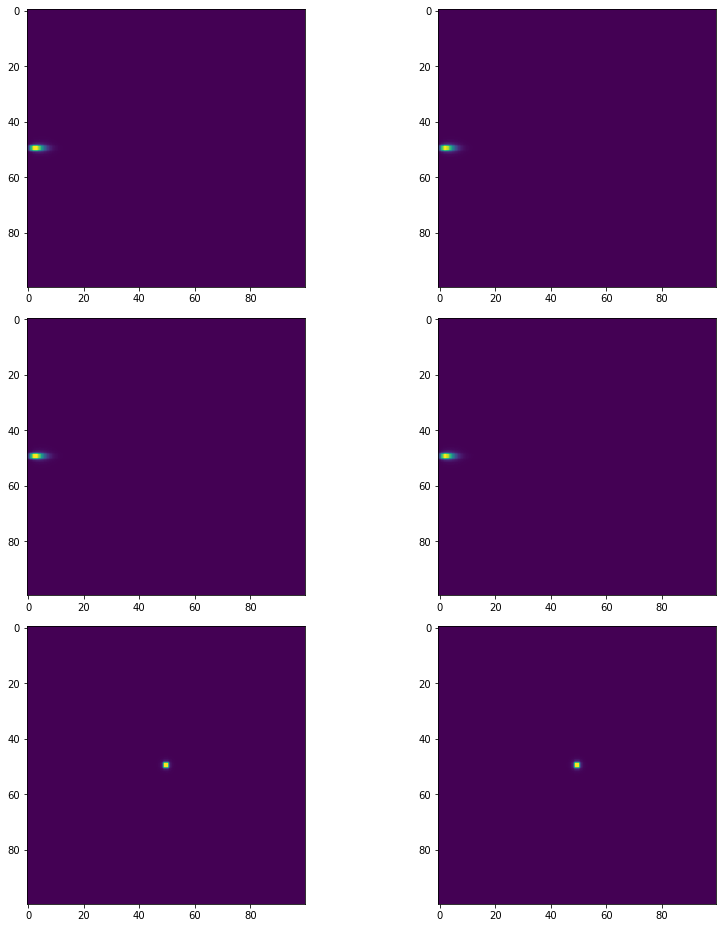

In [11]:
fig_2 = plt.figure(figsize=(13, 13))

for i in range(1, 7):
    exec(f"ax{i}_2 = fig_2.add_subplot(3, 2, {i})")

ax1_2.imshow(np.sum(xhitmap_gamma, axis=0))
ax3_2.imshow(np.sum(yhitmap_gamma, axis=0))
ax5_2.imshow(np.sum(zhitmap_gamma, axis=0))
ax2_2.imshow(np.sum(xhitmap_pi0, axis=0))
ax4_2.imshow(np.sum(yhitmap_pi0, axis=0))
ax6_2.imshow(np.sum(zhitmap_pi0, axis=0))
fig_2.tight_layout()
plt.show()

In [12]:
np.save("./gamma_dataset/xhitma", xhitmap_gamma)
np.save("./gamma_dataset/yhitma", yhitmap_gamma)
np.save("./gamma_dataset/zhitma", zhitmap_gamma)

np.save("./pi0_dataset/xhitmap", xhitmap_pi0)
np.save("./pi0_dataset/yhitmap", yhitmap_pi0)
np.save("./pi0_dataset/zhitmap", zhitmap_pi0)